In [84]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("Mall_customers.csv")

In [37]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [62]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8268 entries, 0 to 8267
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              8268 non-null   int64 
 1   Genre                   8268 non-null   object
 2   Age                     8268 non-null   int64 
 3   Annual Income (k$)      8268 non-null   int64 
 4   Spending Score (1-100)  8268 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 323.1+ KB


In [44]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,8268.000000,8268.000000,8268.000000,8268.000000
mean,4134.500000,43.355225,28.772859,35.784349
std,2386.910346,16.665073,15.869194,26.958948
min,1.000000,18.000000,9.000000,1.000000
25%,2067.750000,30.000000,18.000000,14.000000
50%,4134.500000,40.000000,23.000000,28.000000
75%,6201.250000,53.000000,36.000000,55.000000
max,8268.000000,89.000000,137.000000,100.000000


In [56]:
px.histogram(df,"Genre",color="Genre",title="Gender Comparison")


In [58]:
px.histogram(df,"Age",title="Count of Age")

In [61]:
px.box(df,y="Age",title="Descriptive analysis of Age")

In [67]:
px.histogram(df,"Annual Income (k$)",title="Histogram for annual income")

In [78]:
fig = ff.create_distplot([df["Annual Income (k$)"]], ["dist"])
fig.show()


In [81]:
px.box(df,y="Spending Score (1-100)",title="Descriptive analysis of spending score")

In [82]:
px.histogram(df,"Spending Score (1-100)",title="Histogram for Spending Score")

In [86]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df = df.replace(["Male","Female"],[1,0])

In [91]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


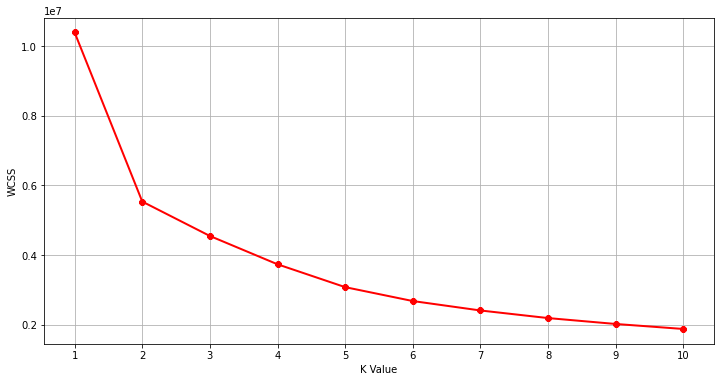

In [92]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

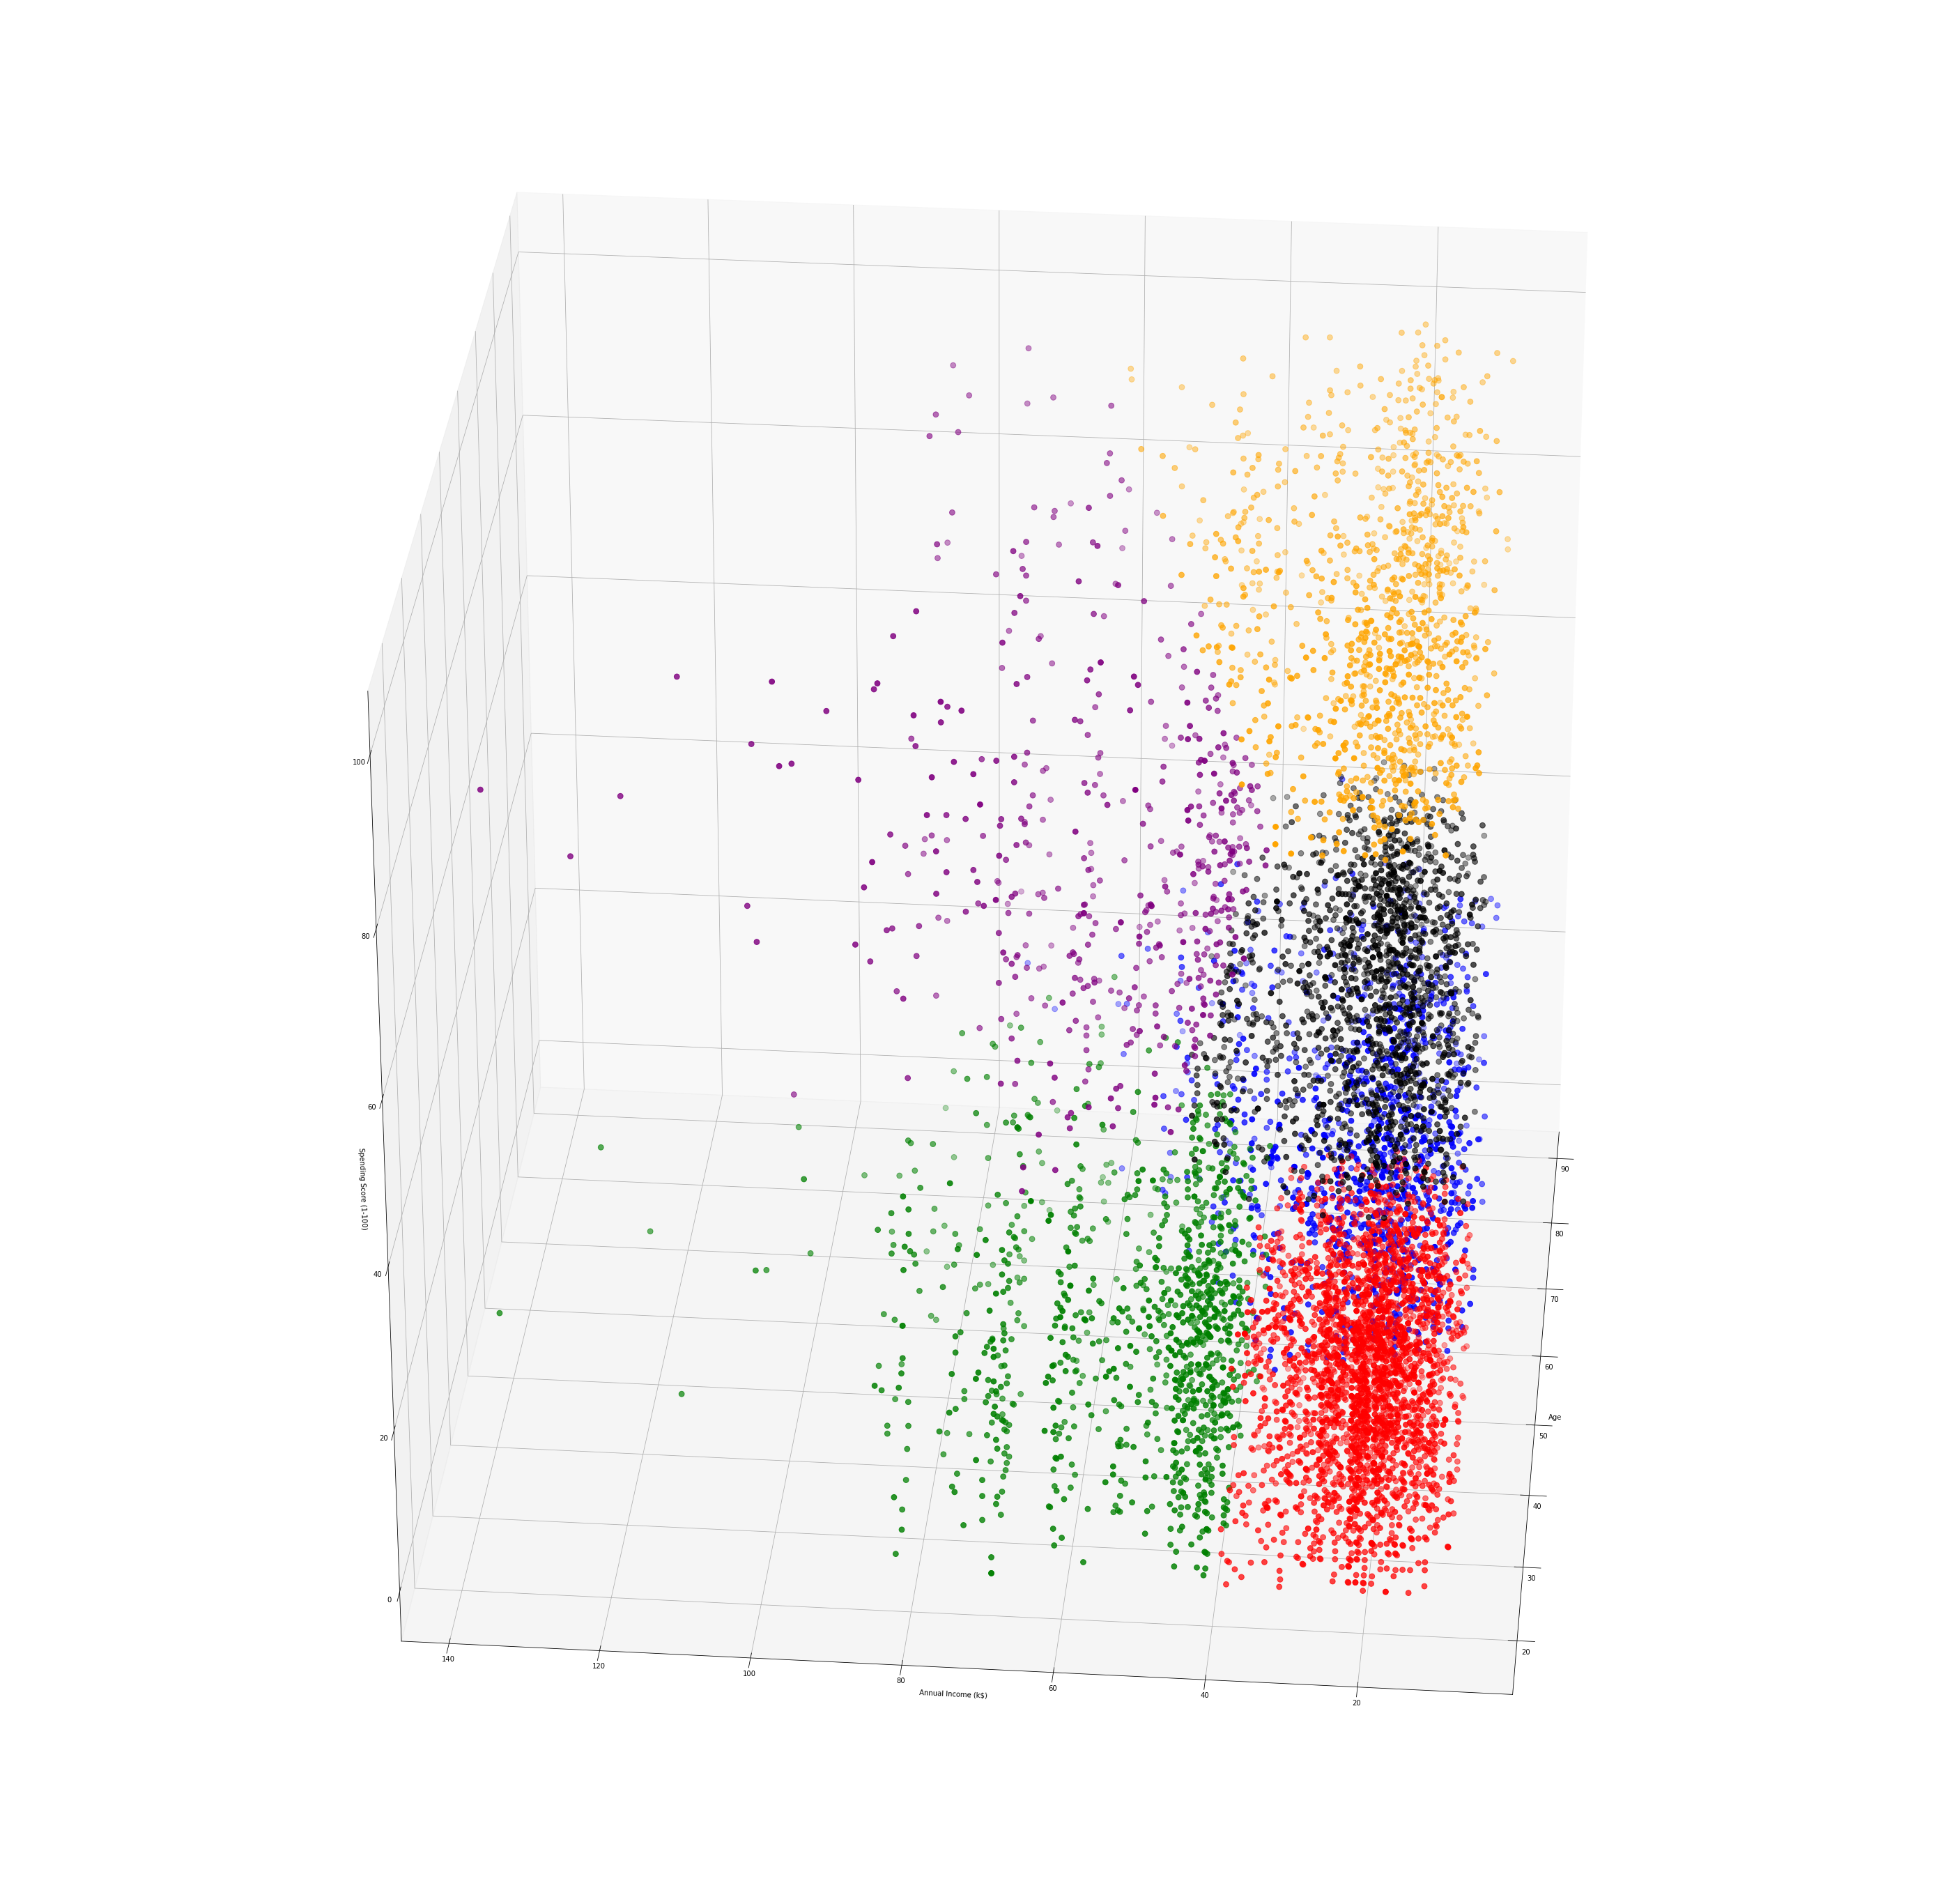

In [100]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='black', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()